<a href="https://colab.research.google.com/github/kinco2030/Chatbot_Sentiment_Analysis/blob/main/%EC%B0%A9%ED%95%9CAI_%EB%82%98%EC%81%9CAI_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 불러오기

In [81]:
import pandas as pd

gemini_df = pd.read_excel('/content/drive/MyDrive/PythonWorkspace/Datasets/Chatbot Sentiment/gemini_chatbot_results.xlsx')
openai_df = pd.read_excel('/content/drive/MyDrive/PythonWorkspace/Datasets/Chatbot Sentiment/openai_chatbot_results.xlsx')

In [4]:
gemini_df.head()

,type,text,answer,prompt_tokens,completion_tokens,total_tokens,duration
0,good,"죄송하지만, 오늘 날씨에 대해 알려주실 수 있을까요?","죄송하지만, 저는 사용자의 현재 위치 정보에 직접 접근할 수 없어서 어느 지역의 날...",17,90,107,5.970253
1,good,"바쁘시겠지만, 지금 시간 알려주실 수 있을까요?","네, 물론이죠!\n\n현재 UTC(협정 세계시) 기준으로 **[현재 년도]년 [현재...",15,101,116,5.726971
2,good,혹시 파이썬에서 리스트 정렬하는 방법을 알려주실 수 있나요?,"네, 파이썬에서 리스트를 정렬하는 방법은 크게 두 가지가 있습니다. 각각의 특징과 ...",20,2406,2426,20.322711
3,good,감기에 걸렸을 때 도움이 되는 음식이 있을까요?,감기에 걸렸을 때는 몸의 회복을 돕고 증상을 완화하는 데 도움이 되는 음식을 섭취하...,14,895,909,13.534652
4,good,오늘 공부 계획을 어떻게 세우면 좋을지 추천해주실 수 있나요?,"네, 오늘 공부 계획을 효과적으로 세우는 데 도움을 드릴게요. 아래는 일반적인 가이...",18,1680,1698,17.638585


In [5]:
openai_df.head()

,type,text,answer,prompt_tokens,completion_tokens,total_tokens,duration
0,good,"죄송하지만, 오늘 날씨에 대해 알려주실 수 있을까요?",죄송합니다. 저는 인공지능 챗봇이기 때문에 현재 날씨 정보를 제공해드릴 수 없습니다...,99,40,139,3.005471
1,good,"바쁘시겠지만, 지금 시간 알려주실 수 있을까요?","죄송합니다, 저는 시간을 알려드릴 수 없습니다.하지만 근처에 시계나 핸드폰이 있으면...",97,37,134,1.929858
2,good,혹시 파이썬에서 리스트 정렬하는 방법을 알려주실 수 있나요?,"네, 파이썬에서 리스트를 정렬하는 방법은 `sort()` 메소드나 `sorted()...",317,37,354,3.788326
3,good,감기에 걸렸을 때 도움이 되는 음식이 있을까요?,감기에 걸렸을 때는 면역력을 강화하고 체력을 회복하기 위해 영양가 있는 음식을 섭취...,504,34,538,4.096364
4,good,오늘 공부 계획을 어떻게 세우면 좋을지 추천해주실 수 있나요?,"공부 계획을 세우는 방법은 개인마다 다를 수 있지만, 일반적으로 다음과 같은 단계를...",549,44,593,5.224252


In [6]:
gemini_df.describe()

,prompt_tokens,completion_tokens,total_tokens,duration
count,120.000000,120.000000,120.000000,120.000000
mean,15.041667,837.433333,852.475000,11.954162
std,5.701829,711.929415,713.064413,4.911910
min,6.000000,4.000000,17.000000,1.776893
25%,10.000000,191.500000,203.250000,7.530860
50%,14.000000,762.000000,779.000000,12.462468
75%,19.250000,1206.250000,1214.750000,14.205411
max,27.000000,3932.000000,3947.000000,29.520945


In [7]:
openai_df.describe()

,prompt_tokens,completion_tokens,total_tokens,duration
count,120.00000,120.000000,120.000000,120.000000
mean,229.45000,32.808333,262.258333,2.779328
std,160.67279,11.017401,163.680284,2.239904
min,6.00000,14.000000,30.000000,0.589510
25%,77.75000,23.000000,118.750000,1.529398
50%,213.50000,34.000000,244.500000,2.436921
75%,370.50000,41.000000,400.000000,3.485185
max,595.00000,54.000000,629.000000,22.171895


# 데이터 시각화 (OpenAI)

In [8]:
openai_kind = openai_df[openai_df['type']=='good']

In [9]:
openai_kind.head()

,type,text,answer,prompt_tokens,completion_tokens,total_tokens,duration
0,good,"죄송하지만, 오늘 날씨에 대해 알려주실 수 있을까요?",죄송합니다. 저는 인공지능 챗봇이기 때문에 현재 날씨 정보를 제공해드릴 수 없습니다...,99,40,139,3.005471
1,good,"바쁘시겠지만, 지금 시간 알려주실 수 있을까요?","죄송합니다, 저는 시간을 알려드릴 수 없습니다.하지만 근처에 시계나 핸드폰이 있으면...",97,37,134,1.929858
2,good,혹시 파이썬에서 리스트 정렬하는 방법을 알려주실 수 있나요?,"네, 파이썬에서 리스트를 정렬하는 방법은 `sort()` 메소드나 `sorted()...",317,37,354,3.788326
3,good,감기에 걸렸을 때 도움이 되는 음식이 있을까요?,감기에 걸렸을 때는 면역력을 강화하고 체력을 회복하기 위해 영양가 있는 음식을 섭취...,504,34,538,4.096364
4,good,오늘 공부 계획을 어떻게 세우면 좋을지 추천해주실 수 있나요?,"공부 계획을 세우는 방법은 개인마다 다를 수 있지만, 일반적으로 다음과 같은 단계를...",549,44,593,5.224252


In [10]:
openai_kind.describe()

,prompt_tokens,completion_tokens,total_tokens,duration
count,60.000000,60.000000,60.000000,60.000000
mean,285.100000,42.416667,327.516667,3.382197
std,153.215557,6.048649,153.117158,2.778063
min,30.000000,31.000000,68.000000,0.717920
25%,191.250000,38.000000,228.000000,2.129918
50%,264.000000,41.000000,308.500000,3.171753
75%,412.000000,46.500000,449.500000,3.923453
max,595.000000,54.000000,629.000000,22.171895


In [11]:
openai_bad = openai_df[openai_df['type']=='bad']

In [12]:
openai_bad.head()

,type,text,answer,prompt_tokens,completion_tokens,total_tokens,duration
60,bad,날씨나 빨리 알려줘.,"지금 기온은 섭씨 25도이고, 흐린 날씨입니다. 현재 날씨 정보가 필요하시면 날씨 ...",67,24,91,2.963958
61,bad,시간 좀 빨리 말해.,"죄송합니다, 제가 시간을 조절할 수는 없습니다. 현재 시간은 어떤 일을 하고 계시는...",79,19,98,1.303046
62,bad,파이썬 정렬법 대충 알려줘.,"1. 리스트를 오름차순으로 정렬하기\n```python\nmy_list = [3, ...",237,28,265,2.728637
63,bad,아플 때 뭐 먹어야 되는지 말해.,아플 때는 가벼운 식사를 섭취하고 수분을 충분히 섭취하는 것이 중요합니다. 일반적으...,264,26,290,2.381498
64,bad,공부 어떻게 해야 할지 알려줘.,공부를 잘하기 위해서는 몇 가지 팁이 있습니다. \n\n1. 계획 세우기: 일정을 ...,332,26,358,4.526516


In [13]:
openai_bad.describe()

,prompt_tokens,completion_tokens,total_tokens,duration
count,60.000000,60.000000,60.000000,60.000000
mean,173.800000,23.200000,197.000000,2.176459
std,149.315818,4.524135,148.087926,1.289386
min,6.000000,14.000000,30.000000,0.589510
25%,32.750000,20.000000,61.250000,1.036342
50%,155.000000,23.000000,176.500000,1.869952
75%,263.250000,26.000000,284.000000,3.005160
max,502.000000,35.000000,517.000000,5.528137


prompt_tokens	요청 시 보낸 모든 입력 텍스트	시스템 메시지, 유저 질문, 이전 대화	모델이 응답하기 전

completion_tokens	모델이 생성한 응답	챗봇의 대답, 생성된 코드	모델 출력

total_tokens	둘의 합계	입력+출력 전체	과금 기준

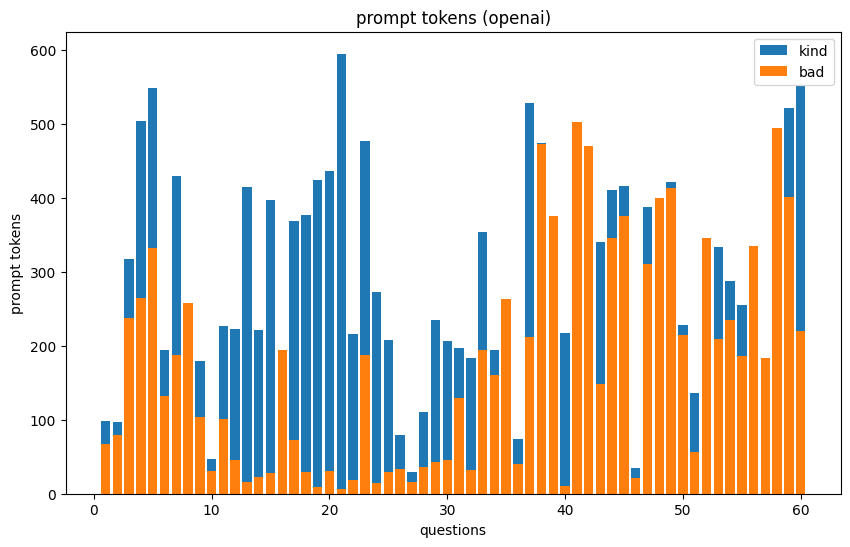

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 61)

plt.figure(figsize=(10, 6))
plt.bar(x, openai_kind['prompt_tokens'], label='kind')
plt.bar(x, openai_bad['prompt_tokens'], label='bad')
plt.title('prompt tokens (openai)')
plt.xlabel('questions')
plt.ylabel('prompt tokens')
plt.legend()
plt.show()

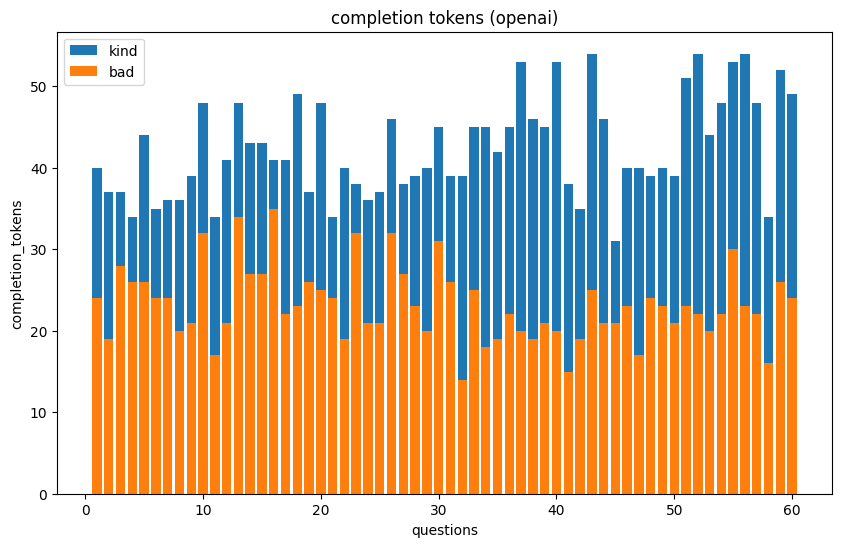

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 61)

plt.figure(figsize=(10, 6))
plt.bar(x, openai_kind['completion_tokens'], label='kind')
plt.bar(x, openai_bad['completion_tokens'], label='bad')
plt.title('completion tokens (openai)')
plt.xlabel('questions')
plt.ylabel('completion_tokens')
plt.legend()
plt.show()

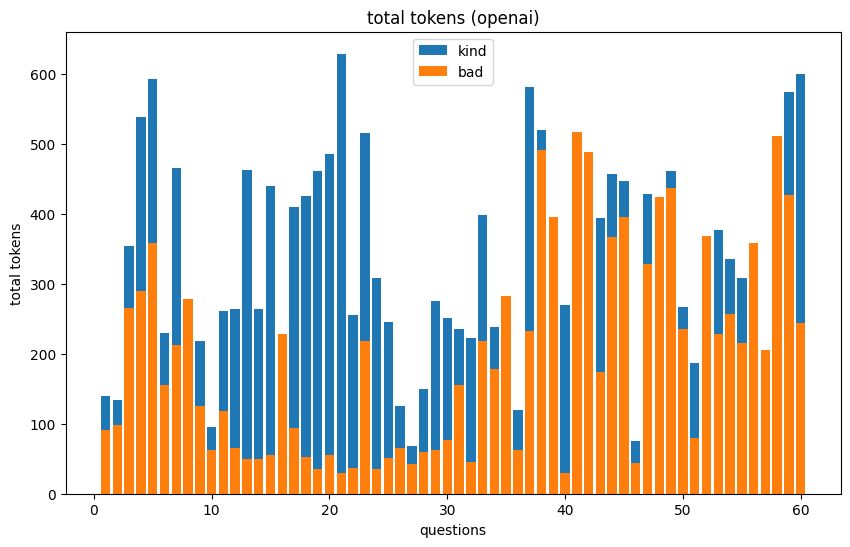

In [16]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 61)

plt.figure(figsize=(10, 6))
plt.bar(x, openai_kind['total_tokens'], label='kind')
plt.bar(x, openai_bad['total_tokens'], label='bad')
plt.title('total tokens (openai)')
plt.xlabel('questions')
plt.ylabel('total tokens')
plt.legend()
plt.show()

Text(0, 0.5, 'duration')

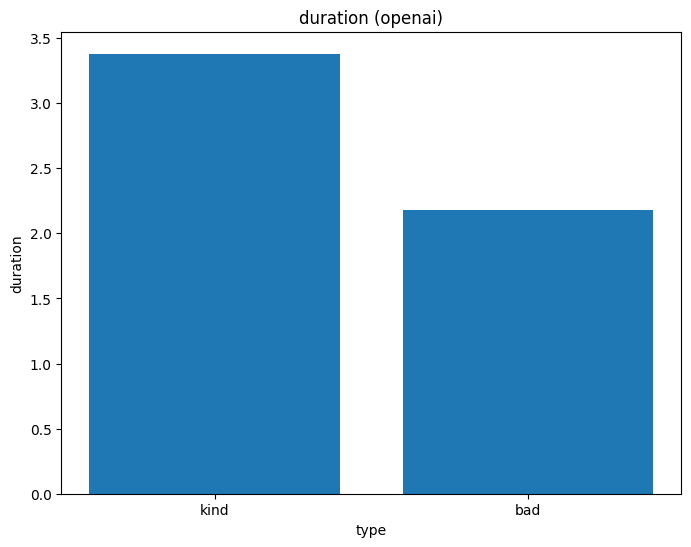

In [17]:
import numpy as np

kind_duration_mean = round(np.mean(openai_kind['duration']), 2)
bad_duration_mean = round(np.mean(openai_bad['duration']), 2)

# print(kind_duration_mean)
# print(bad_duration_mean)

x = ['kind', 'bad']
y = [kind_duration_mean, bad_duration_mean]

plt.figure(figsize=(8, 6))
plt.bar(x, y)
plt.title('duration (openai)')
plt.xlabel('type')
plt.ylabel('duration')

/tmp/ipython-input-3266839863.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_list, labels=['prompt tokens', 'completion tokens', 'total tokens', 'duration'])


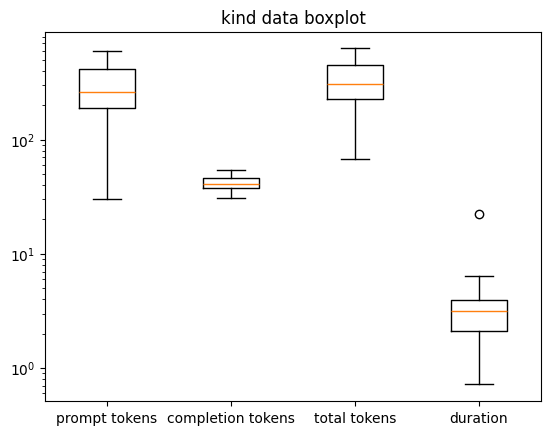

In [18]:
data_list = [
    openai_kind['prompt_tokens'],
    openai_kind['completion_tokens'],
    openai_kind['total_tokens'],
    openai_kind['duration']
]

plt.title('kind data boxplot')
plt.boxplot(data_list, labels=['prompt tokens', 'completion tokens', 'total tokens', 'duration'])
plt.yscale('log')
plt.show()

/tmp/ipython-input-1677322073.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_list, labels=['prompt tokens', 'completion tokens', 'total tokens', 'duration'])


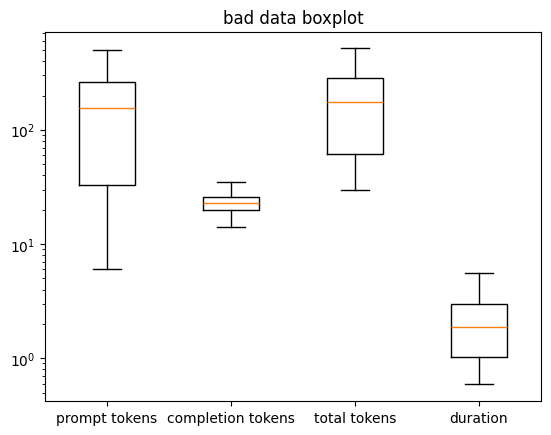

In [19]:
data_list = [
    openai_bad['prompt_tokens'],
    openai_bad['completion_tokens'],
    openai_bad['total_tokens'],
    openai_bad['duration']
]

plt.title('bad data boxplot')
plt.boxplot(data_list, labels=['prompt tokens', 'completion tokens', 'total tokens', 'duration'])
plt.yscale('log')
plt.show()

# 감정 분석 (Open AI)

In [20]:
!pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [21]:
# 예제
from transformers import pipeline

# 감정 분석 파이프라인 로드
classifier = pipeline("sentiment-analysis")

# 감정 분석 수행
text = "I love python"
result = classifier(text)

print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9997324347496033}]


In [22]:
from transformers import pipeline

classifier = pipeline(
    "sentiment-analysis",
    model='sangrimlee/bert-base-multilingual-cased-nsmc',
)

results = classifier("이 노래는 정말 최고에요!")
print(type(results[0]['score']))

config.json:   0%|          | 0.00/932 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/712M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/711M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


<class 'float'>


In [23]:
openai_df.head(2)

,type,text,answer,prompt_tokens,completion_tokens,total_tokens,duration
0,good,"죄송하지만, 오늘 날씨에 대해 알려주실 수 있을까요?",죄송합니다. 저는 인공지능 챗봇이기 때문에 현재 날씨 정보를 제공해드릴 수 없습니다...,99,40,139,3.005471
1,good,"바쁘시겠지만, 지금 시간 알려주실 수 있을까요?","죄송합니다, 저는 시간을 알려드릴 수 없습니다.하지만 근처에 시계나 핸드폰이 있으면...",97,37,134,1.929858


In [68]:
import pandas as pd
results = []

classifier = pipeline(
    "sentiment-analysis",
    model='sangrimlee/bert-base-multilingual-cased-nsmc',
    truncation=True,
    max_length=512,
    padding=True
)

for index in openai_df['answer']:
    result = classifier(index)
    results.append({'label': result[0]['label'], 'score': round(result[0]['score'], 2)})

sentiment_df = pd.DataFrame(results)

Device set to use cuda:0


In [69]:
sentiment_df.head()

,label,score
0,positive,0.75
1,positive,0.68
2,negative,0.79
3,positive,0.90
4,positive,0.91


In [70]:
openai_df = pd.concat([openai_df, sentiment_df], axis=1)
openai_df

,type,text,answer,prompt_tokens,completion_tokens,total_tokens,duration,label,score
0,good,"죄송하지만, 오늘 날씨에 대해 알려주실 수 있을까요?",죄송합니다. 저는 인공지능 챗봇이기 때문에 현재 날씨 정보를 제공해드릴 수 없습니다...,99,40,139,3.005471,positive,0.75
1,good,"바쁘시겠지만, 지금 시간 알려주실 수 있을까요?","죄송합니다, 저는 시간을 알려드릴 수 없습니다.하지만 근처에 시계나 핸드폰이 있으면...",97,37,134,1.929858,positive,0.68
2,good,혹시 파이썬에서 리스트 정렬하는 방법을 알려주실 수 있나요?,"네, 파이썬에서 리스트를 정렬하는 방법은 `sort()` 메소드나 `sorted()...",317,37,354,3.788326,negative,0.79
3,good,감기에 걸렸을 때 도움이 되는 음식이 있을까요?,감기에 걸렸을 때는 면역력을 강화하고 체력을 회복하기 위해 영양가 있는 음식을 섭취...,504,34,538,4.096364,positive,0.90
4,good,오늘 공부 계획을 어떻게 세우면 좋을지 추천해주실 수 있나요?,"공부 계획을 세우는 방법은 개인마다 다를 수 있지만, 일반적으로 다음과 같은 단계를...",549,44,593,5.224252,positive,0.91
...,...,...,...,...,...,...,...,...,...
115,bad,불안 줄이는 법이나 말해.,1. 호흡 운동: 깊게 숨을 들이마시고 천천히 내쉬는 호흡 운동을 통해 긴장을 풀어...,335,23,358,3.128766,positive,0.97
116,bad,답변이나 간결하게 정리해.,물어보신 내용이 무엇인가요? 간결한 답변을 원하시는 것 같은데요. 부엉이는 밤에 활...,184,22,206,1.787596,positive,0.97
117,bad,취미나 추천해.,1. 요가: 몸과 마음을 편안하게 하고 신체를 유연하게 만들어주는 요가는 많은 사람...,495,16,511,3.981719,positive,0.99
118,bad,소셜 미디어 특징이나 말해.,소셜 미디어는 사용자들이 인터넷을 통해 콘텐츠를 공유하고 소통하는 플랫폼이다. 사용...,401,26,427,3.196740,positive,0.93


In [71]:
openai_kind = openai_df[openai_df['type']=='good']
openai_bad = openai_df[openai_df['type']=='bad']

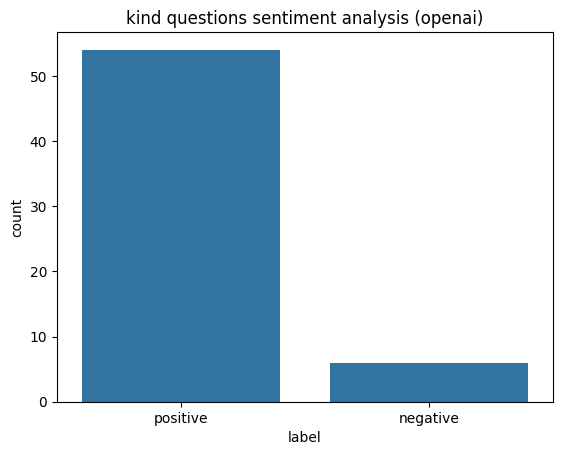

In [72]:
import seaborn as sns

plt.title('kind questions sentiment analysis (openai)')
sns.countplot(x='label', data=openai_kind)
plt.show()

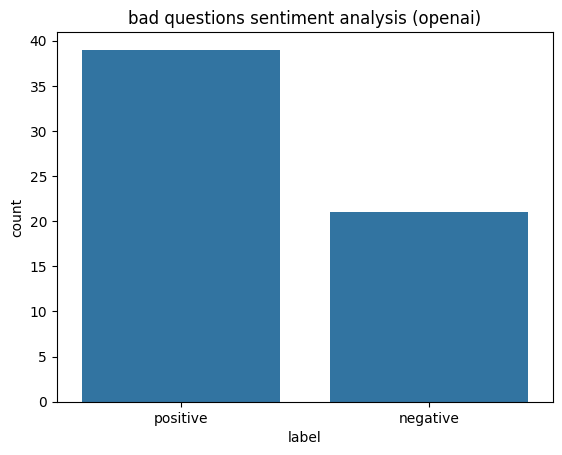

In [73]:
plt.title('bad questions sentiment analysis (openai)')
sns.countplot(x='label', data=openai_bad)
plt.show()

# 상관관계 분석 (Open AI)
### 상관계수 범위 : -1~1, p_value < 0.05 이여야함

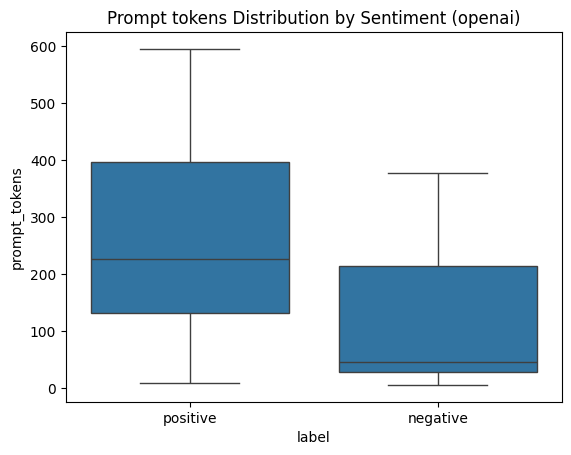

In [30]:
sns.boxplot(x='label', y='prompt_tokens', data=openai_df)
plt.title('Prompt tokens Distribution by Sentiment (openai)')
plt.show()

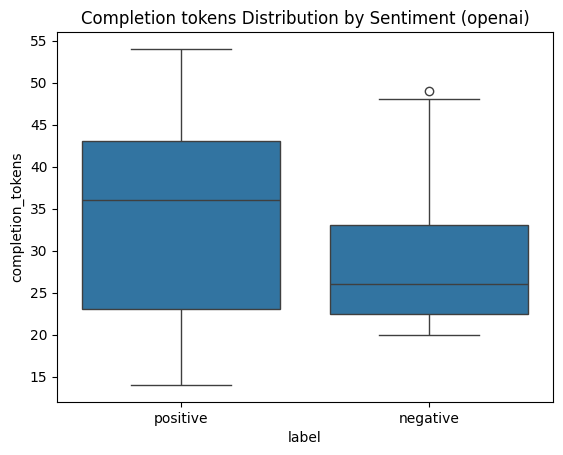

In [31]:
sns.boxplot(x='label', y='completion_tokens', data=openai_df)
plt.title('Completion tokens Distribution by Sentiment (openai)')
plt.show()

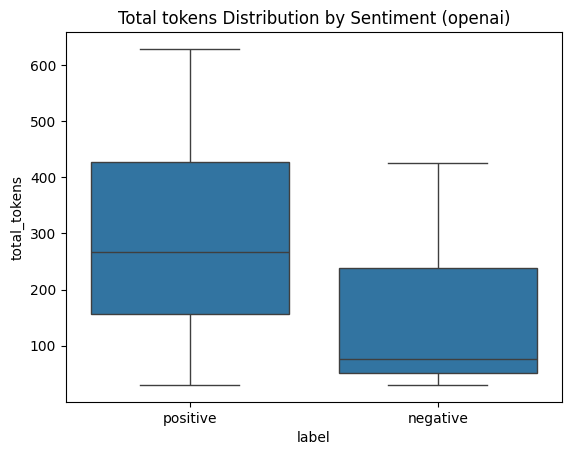

In [32]:
sns.boxplot(x='label', y='total_tokens', data=openai_df)
plt.title('Total tokens Distribution by Sentiment (openai)')
plt.show()

## Point-Biserial

In [33]:
from scipy.stats import pointbiserialr

openai_df['label_binary'] = openai_df['label'].map({'negative': 0, 'positive': 1})

corr, p_value = pointbiserialr(openai_df['label_binary'], openai_df['prompt_tokens'])

print(f"상관계수: {corr:.4f}")
print(f"p-value: {p_value*100:.4f}%")

상관계수: 0.3554
p-value: 0.0068%


In [34]:
corr, p_value = pointbiserialr(openai_df['label_binary'], openai_df['completion_tokens'])

print(f"상관계수: {corr:.4f}")
print(f"p-value: {p_value*100:.4f}%")

상관계수: 0.1816
p-value: 4.7172%


In [35]:
corr, p_value = pointbiserialr(openai_df['label_binary'], openai_df['total_tokens'])

print(f"상관계수: {corr:.4f}")
print(f"p-value: {p_value*100:.4f}%")

상관계수: 0.3611
p-value: 0.0051%


In [36]:
corr, p_value = pointbiserialr(openai_df['label_binary'], openai_df['duration'])

print(f"상관계수: {corr:.4f}")
print(f"p-value: {p_value*100:.4f}%")

상관계수: 0.2536
p-value: 0.5200%


In [37]:
def calculate_correlation(x_col, y_col):
    corr, p_value = pointbiserialr(openai_df[x_col], openai_df[y_col])
    corr = round(corr, 4)
    p_value = round(p_value*100, 4)
    return corr, p_value

variables = ['prompt_tokens', 'completion_tokens', 'total_tokens', 'duration']

results = {}
for col in variables:
    corr, p_value = calculate_correlation('label_binary', col)
    results[col] = {'corr': corr, 'p_value': p_value}
    print(f"{col}: 상관계수 = {corr}, p-value = {p_value}%")

results_list = []

for col in variables:
    try:
        corr, p_value = calculate_correlation('label_binary', col)
        results_list.append({'variables': col, 'corr': corr, 'p-value(%)': p_value})
    except ValueError as e:
        print(f"{col} 변수 처리 중 오류 발생 {e}")
        results_list.append({'variables': col, 'corr': None, 'p-value': None})

results_df = pd.DataFrame(results_list)
results_df

prompt_tokens: 상관계수 = 0.3554, p-value = 0.0068%
completion_tokens: 상관계수 = 0.1816, p-value = 4.7172%
total_tokens: 상관계수 = 0.3611, p-value = 0.0051%
duration: 상관계수 = 0.2536, p-value = 0.52%


,variables,corr,p-value(%)
0,prompt_tokens,0.3554,0.0068
1,completion_tokens,0.1816,4.7172
2,total_tokens,0.3611,0.0051
3,duration,0.2536,0.5200


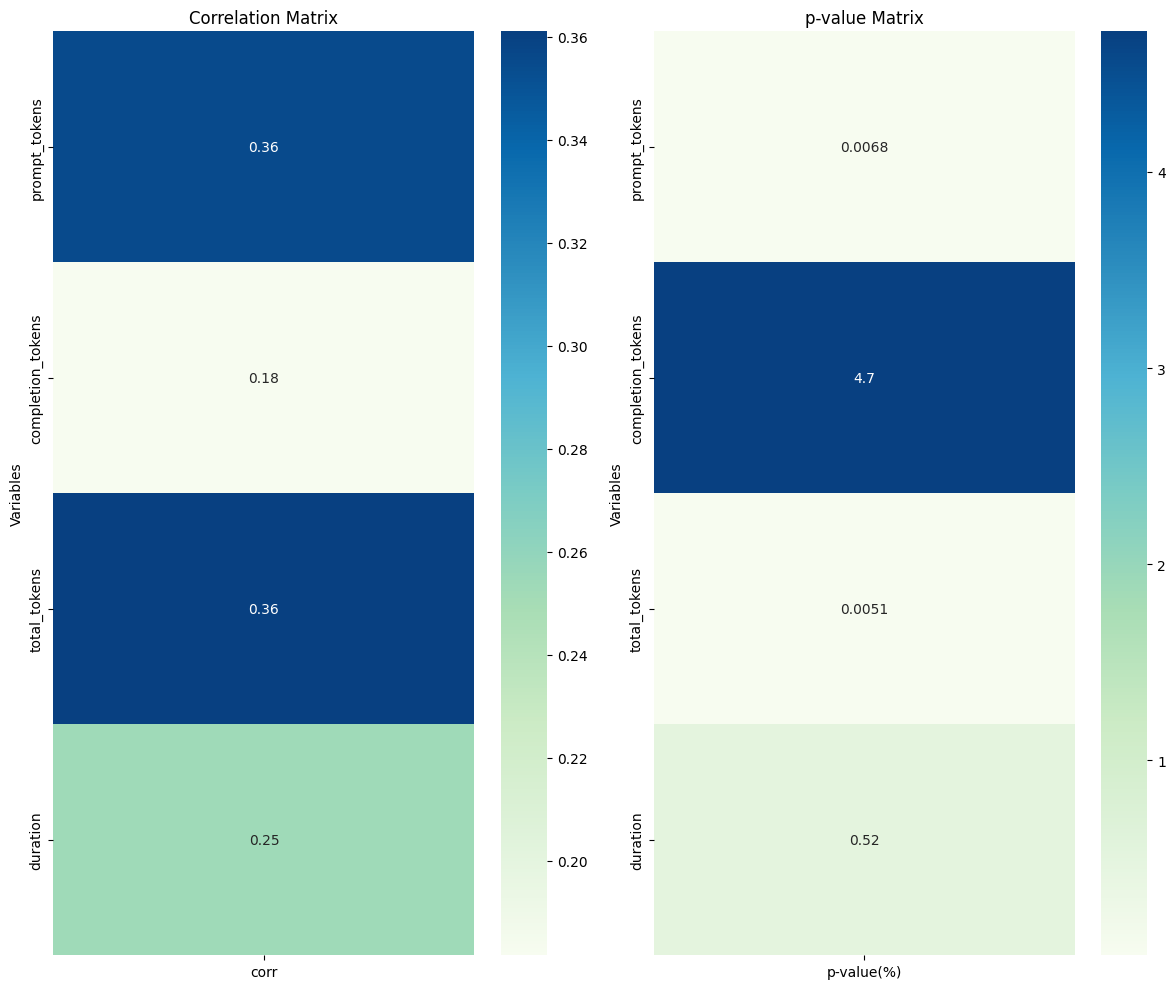

In [38]:
corr_matrix = results_df.set_index('variables')['corr'].values.reshape(-1, 1)
p_value_matrix = results_df.set_index('variables')['p-value(%)'].values.reshape(-1, 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, cmap='GnBu', cbar=True, yticklabels=results_df['variables'], xticklabels=['corr'], ax=ax[0])
ax[0].set_title('Correlation Matrix')
ax[0].set_ylabel('Variables')

sns.heatmap(p_value_matrix, annot=True, cmap='GnBu', cbar=True, yticklabels=results_df['variables'], xticklabels=['p-value(%)'], ax=ax[1])
ax[1].set_title('p-value Matrix')
ax[1].set_ylabel('Variables')

plt.tight_layout()
plt.show()

# 데이터 시각화 (Gemini)

In [39]:
gemini_kind = gemini_df[gemini_df['type']=='good']
gemini_bad = gemini_df[gemini_df['type']=='bad']

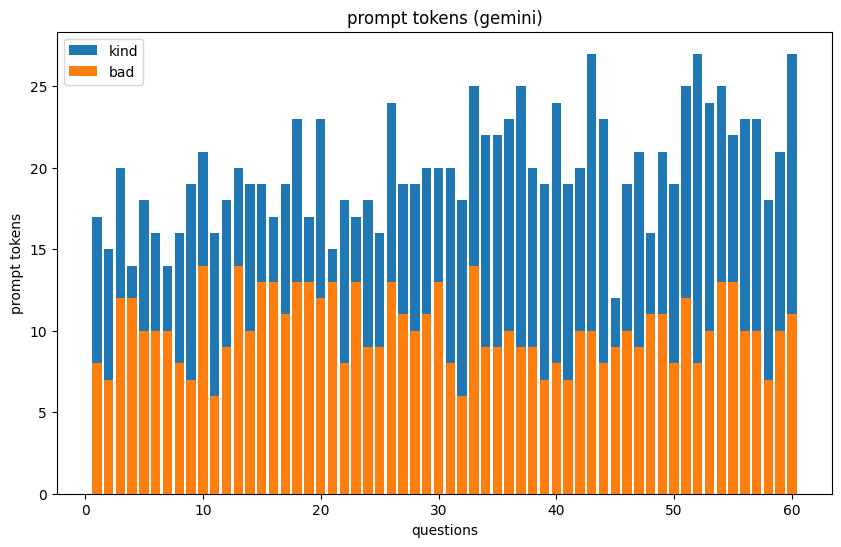

In [40]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 61)

plt.figure(figsize=(10, 6))
plt.bar(x, gemini_kind['prompt_tokens'], label='kind')
plt.bar(x, gemini_bad['prompt_tokens'], label='bad')
plt.title('prompt tokens (gemini)')
plt.xlabel('questions')
plt.ylabel('prompt tokens')
plt.legend()
plt.show()

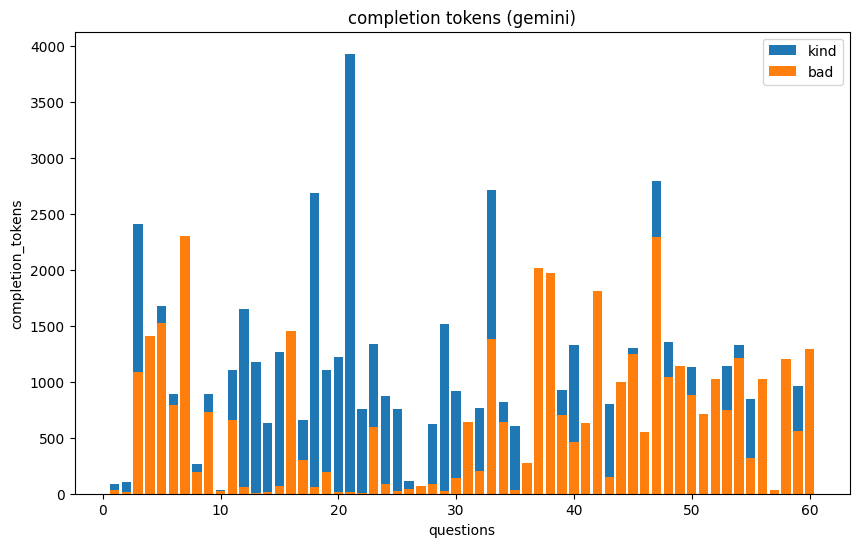

In [41]:
x = np.arange(1, 61)

plt.figure(figsize=(10, 6))
plt.bar(x, gemini_kind['completion_tokens'], label='kind')
plt.bar(x, gemini_bad['completion_tokens'], label='bad')
plt.title('completion tokens (gemini)')
plt.xlabel('questions')
plt.ylabel('completion_tokens')
plt.legend()
plt.show()

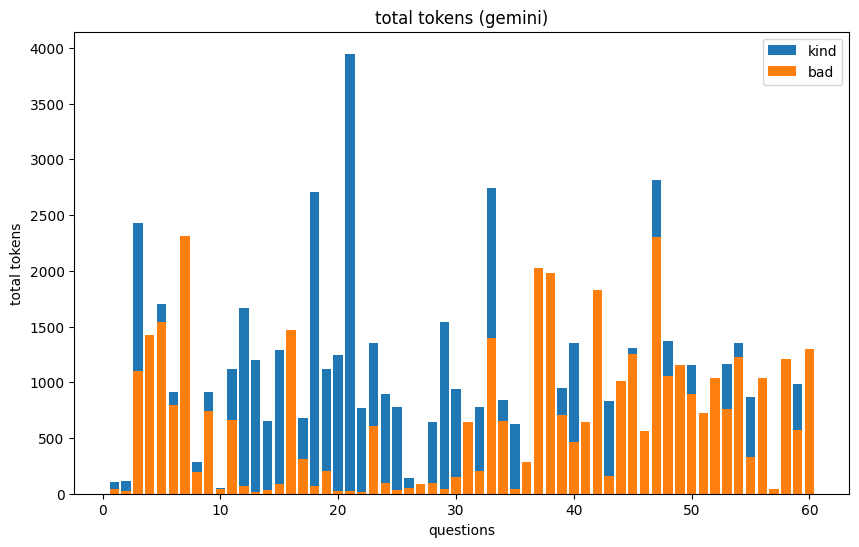

In [42]:
x = np.arange(1, 61)

plt.figure(figsize=(10, 6))
plt.bar(x, gemini_kind['total_tokens'], label='kind')
plt.bar(x, gemini_bad['total_tokens'], label='bad')
plt.title('total tokens (gemini)')
plt.xlabel('questions')
plt.ylabel('total tokens')
plt.legend()
plt.show()

Text(0, 0.5, 'duration')

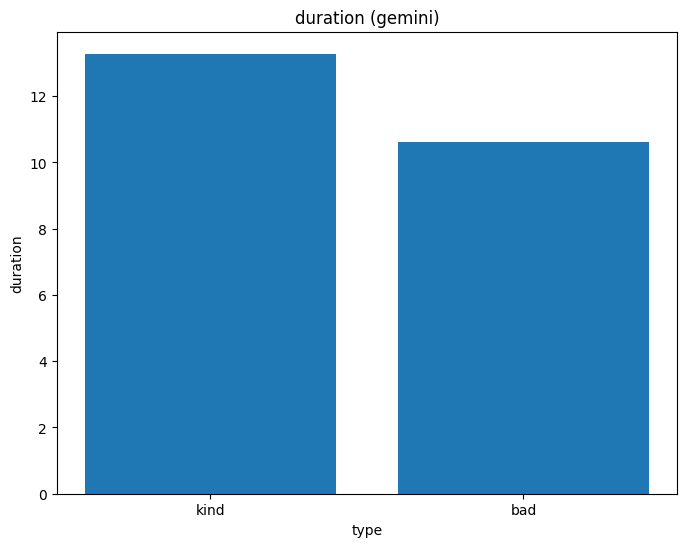

In [43]:
import numpy as np

kind_duration_mean = round(np.mean(gemini_kind['duration']), 2)
bad_duration_mean = round(np.mean(gemini_bad['duration']), 2)

# print(kind_duration_mean)
# print(bad_duration_mean)

x = ['kind', 'bad']
y = [kind_duration_mean, bad_duration_mean]

plt.figure(figsize=(8, 6))
plt.bar(x, y)
plt.title('duration (gemini)')
plt.xlabel('type')
plt.ylabel('duration')

/tmp/ipython-input-2634053981.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_list, labels=['prompt tokens', 'completion tokens', 'total tokens', 'duration'])


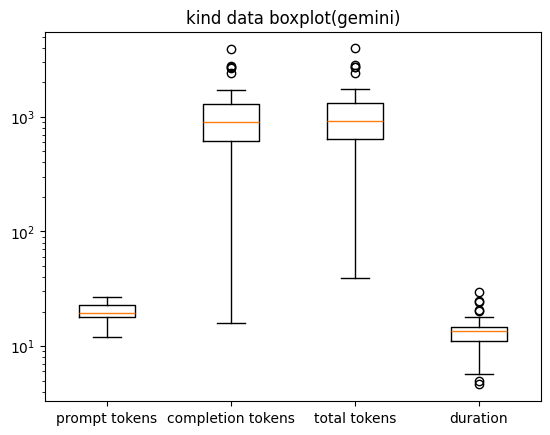

In [44]:
data_list = [
    gemini_kind['prompt_tokens'],
    gemini_kind['completion_tokens'],
    gemini_kind['total_tokens'],
    gemini_kind['duration']
]

plt.title('kind data boxplot(gemini)')
plt.boxplot(data_list, labels=['prompt tokens', 'completion tokens', 'total tokens', 'duration'])
plt.yscale('log')
plt.show()

/tmp/ipython-input-197736374.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_list, labels=['prompt tokens', 'completion tokens', 'total tokens', 'duration'])


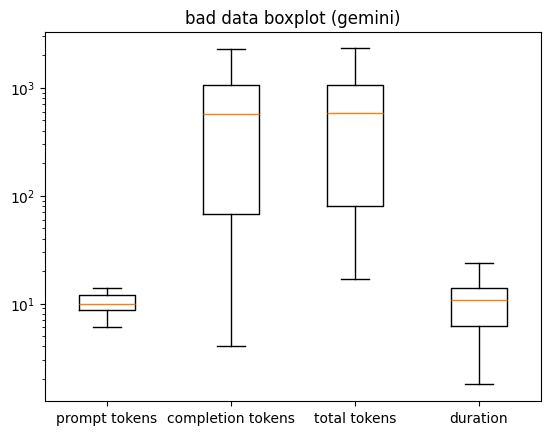

In [45]:
data_list = [
    gemini_bad['prompt_tokens'],
    gemini_bad['completion_tokens'],
    gemini_bad['total_tokens'],
    gemini_bad['duration']
]

plt.title('bad data boxplot (gemini)')
plt.boxplot(data_list, labels=['prompt tokens', 'completion tokens', 'total tokens', 'duration'])
plt.yscale('log')
plt.show()

# 감정 분석 (Gemini)

In [46]:
!pip install transformers torch

In [82]:
gemini_df.head(2)

,type,text,answer,prompt_tokens,completion_tokens,total_tokens,duration
0,good,"죄송하지만, 오늘 날씨에 대해 알려주실 수 있을까요?","죄송하지만, 저는 사용자의 현재 위치 정보에 직접 접근할 수 없어서 어느 지역의 날...",17,90,107,5.970253
1,good,"바쁘시겠지만, 지금 시간 알려주실 수 있을까요?","네, 물론이죠!\n\n현재 UTC(협정 세계시) 기준으로 **[현재 년도]년 [현재...",15,101,116,5.726971


In [83]:
from transformers import pipeline
import pandas as pd
results = []

classifier = pipeline(
    "sentiment-analysis",
    model='sangrimlee/bert-base-multilingual-cased-nsmc',
    truncation=True,
    max_length=512,
    padding=True
)

for index in gemini_df['answer']:
    result = classifier(index)
    results.append({'label': result[0]['label'], 'score': round(result[0]['score'], 2)})

sentiment_df = pd.DataFrame(results)

Device set to use cuda:0


In [84]:
sentiment_df.head()

,label,score
0,positive,0.83
1,positive,0.80
2,negative,0.81
3,positive,0.94
4,positive,0.67


In [85]:
gemini_df = pd.concat([gemini_df, sentiment_df], axis=1)

In [86]:
gemini_kind = gemini_df[gemini_df['type']=='good']
gemini_bad = gemini_df[gemini_df['type']=='bad']

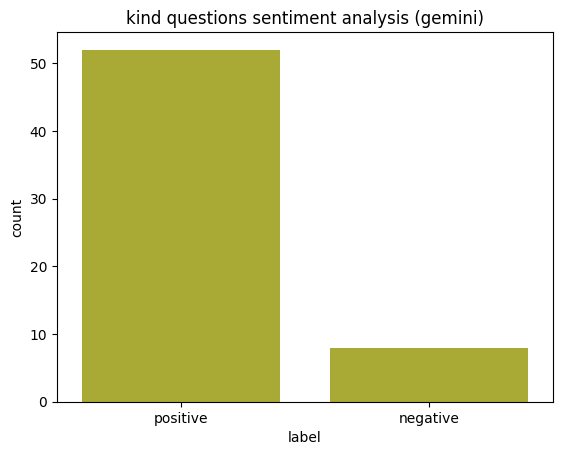

In [87]:
import seaborn as sns

plt.title('kind questions sentiment analysis (gemini)')
sns.countplot(x='label', data=gemini_kind, color=sns.color_palette()[8])
plt.show()

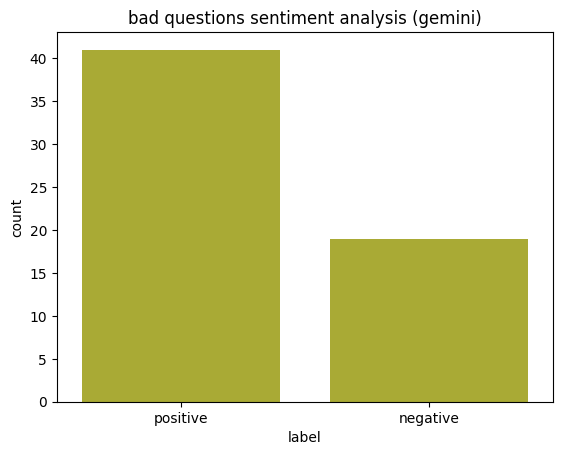

In [88]:
plt.title('bad questions sentiment analysis (gemini)')
sns.countplot(x='label', data=gemini_bad, color=sns.color_palette()[8])
plt.show()

# 상관관계 분석 (Gemini)

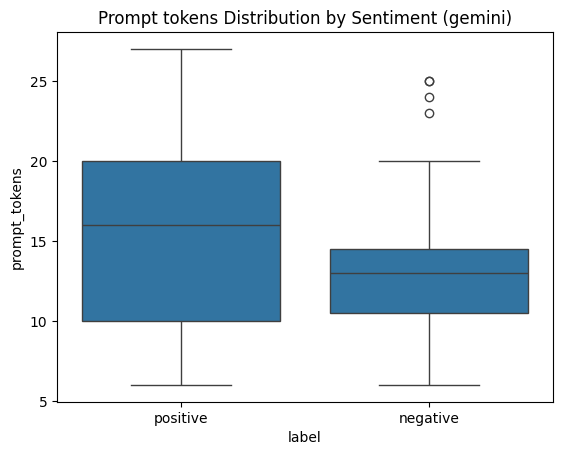

In [89]:
sns.boxplot(x='label', y='prompt_tokens', data=gemini_df)
plt.title('Prompt tokens Distribution by Sentiment (gemini)')
plt.show()

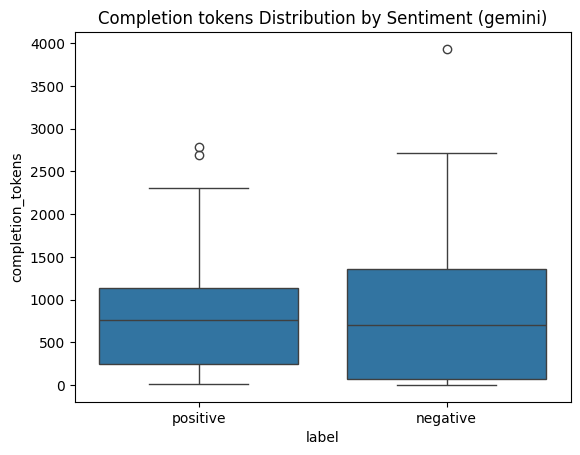

In [90]:
sns.boxplot(x='label', y='completion_tokens', data=gemini_df)
plt.title('Completion tokens Distribution by Sentiment (gemini)')
plt.show()

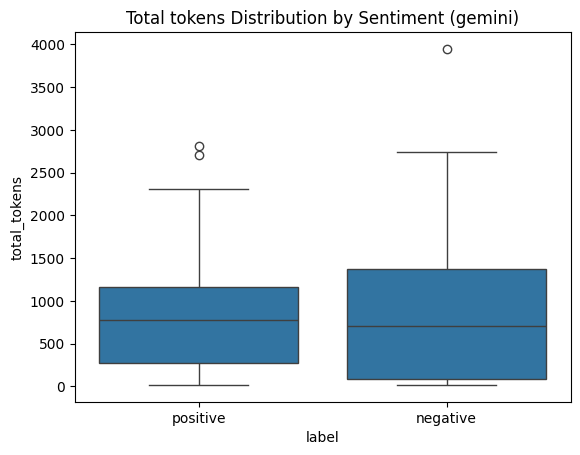

In [91]:
sns.boxplot(x='label', y='total_tokens', data=gemini_df)
plt.title('Total tokens Distribution by Sentiment (gemini)')
plt.show()

In [92]:
from scipy.stats import pointbiserialr

gemini_df['label_binary'] = gemini_df['label'].map({'negative': 0, 'positive': 1})

corr, p_value = pointbiserialr(gemini_df['label_binary'], gemini_df['prompt_tokens'])

print(f"상관계수: {corr:.4f}")
print(f"p-value: {p_value*100:.4f}%")

상관계수: 0.1270
p-value: 16.7007%


In [93]:
corr, p_value = pointbiserialr(gemini_df['label_binary'], gemini_df['completion_tokens'])

print(f"상관계수: {corr:.4f}")
print(f"p-value: {p_value*100:.4f}%")

상관계수: -0.0796
p-value: 38.7223%


In [94]:
corr, p_value = pointbiserialr(gemini_df['label_binary'], gemini_df['total_tokens'])

print(f"상관계수: {corr:.4f}")
print(f"p-value: {p_value*100:.4f}%")

상관계수: -0.0785
p-value: 39.4088%


In [95]:
corr, p_value = pointbiserialr(gemini_df['label_binary'], gemini_df['duration'])

print(f"상관계수: {corr:.4f}")
print(f"p-value: {p_value*100:.4f}%")

상관계수: -0.0241
p-value: 79.3559%


In [96]:
def calculate_correlation(x_col, y_col):
    corr, p_value = pointbiserialr(gemini_df[x_col], gemini_df[y_col])
    corr = round(corr, 4)
    p_value = round(p_value*100, 4)
    return corr, p_value

variables = ['prompt_tokens', 'completion_tokens', 'total_tokens', 'duration']

results = {}
for col in variables:
    corr, p_value = calculate_correlation('label_binary', col)
    results[col] = {'corr': corr, 'p_value': p_value}
    print(f"{col}: 상관계수 = {corr}, p-value = {p_value}%")

results_list = []

for col in variables:
    try:
        corr, p_value = calculate_correlation('label_binary', col)
        results_list.append({'variables': col, 'corr': corr, 'p-value(%)': p_value})
    except ValueError as e:
        print(f"{col} 변수 처리 중 오류 발생 {e}")
        results_list.append({'variables': col, 'corr': None, 'p-value': None})

results_df = pd.DataFrame(results_list)
results_df

prompt_tokens: 상관계수 = 0.127, p-value = 16.7007%
completion_tokens: 상관계수 = -0.0796, p-value = 38.7223%
total_tokens: 상관계수 = -0.0785, p-value = 39.4088%
duration: 상관계수 = -0.0241, p-value = 79.3559%


,variables,corr,p-value(%)
0,prompt_tokens,0.1270,16.7007
1,completion_tokens,-0.0796,38.7223
2,total_tokens,-0.0785,39.4088
3,duration,-0.0241,79.3559


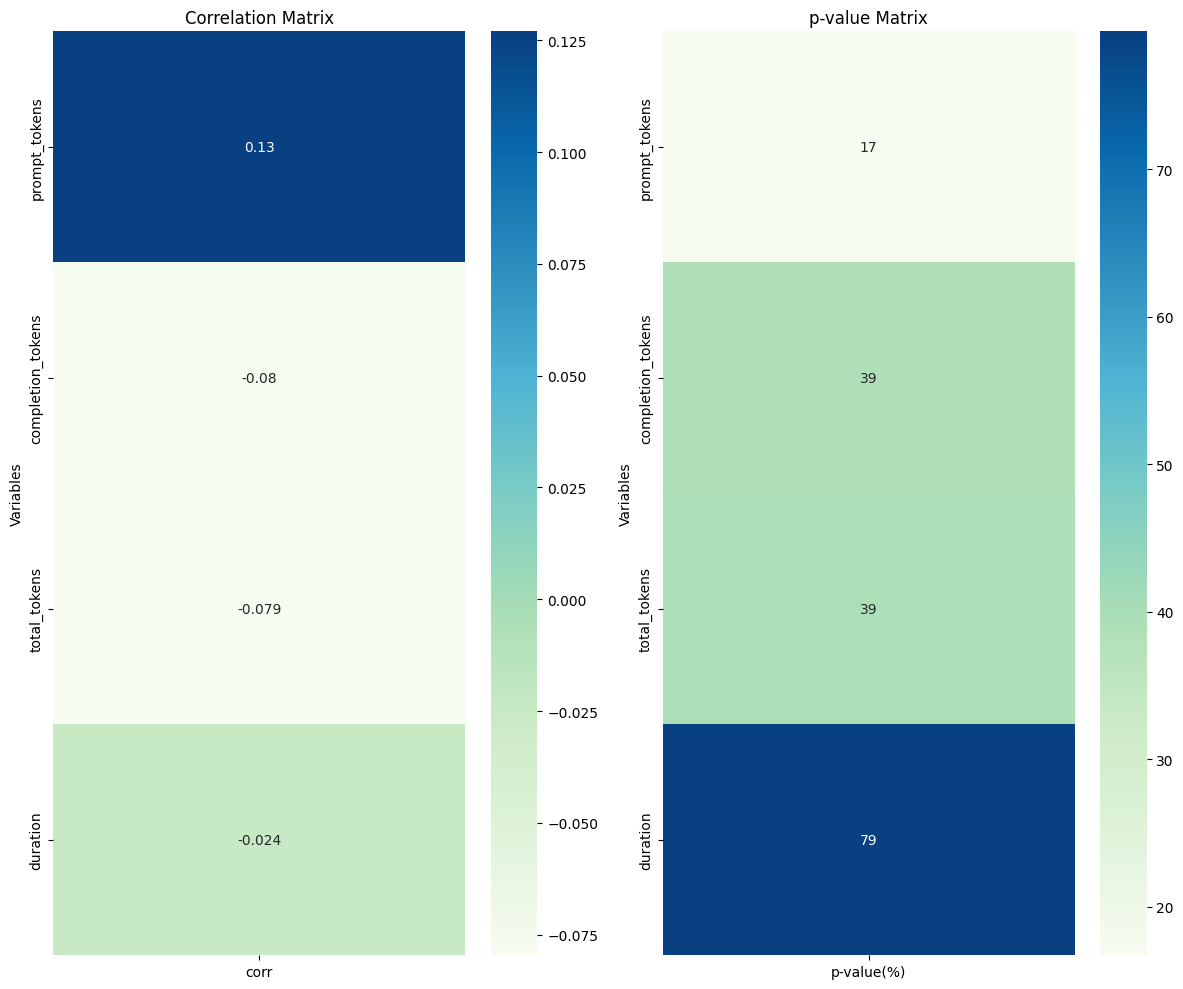

In [97]:
corr_matrix = results_df.set_index('variables')['corr'].values.reshape(-1, 1)
p_value_matrix = results_df.set_index('variables')['p-value(%)'].values.reshape(-1, 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, cmap='GnBu', cbar=True, yticklabels=results_df['variables'], xticklabels=['corr'], ax=ax[0])
ax[0].set_title('Correlation Matrix')
ax[0].set_ylabel('Variables')

sns.heatmap(p_value_matrix, annot=True, cmap='GnBu', cbar=True, yticklabels=results_df['variables'], xticklabels=['p-value(%)'], ax=ax[1])
ax[1].set_title('p-value Matrix')
ax[1].set_ylabel('Variables')

plt.tight_layout()
plt.show()